In [1]:
# !pip install textblob

In [2]:
# !pip install tweepy

In [3]:
# !pip install -U spacy

In [4]:
# !pip install wordcloud

In [5]:
import requests
#Beautifulsoupis for web screapping used t scrap specific content
from bs4 import BeautifulSoup as bs
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import nltk
import tweepy

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [6]:
Elon_musk = pd.read_csv('D:/ExcelRassignments/Assignment11/Elon_musk.csv', encoding='ISO-8859-1')

In [7]:
Elon_musk

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [27]:
Elon_musk.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [28]:
tweet = Elon_musk.drop(['Unnamed: 0'], axis =1)

In [29]:
tweet.head(10)

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,"Frodo was the underdoge,\nAll thought he would..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,The most entertaining outcome is the most likely


In [30]:
tweet = [Text.strip() for Text in tweet.Text]
tweet = [Text for Text in tweet if Text]

In [31]:
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [32]:
text = ' '.join(tweet)
len(text)

158702

In [49]:
no_punc_text = text.translate(str.maketrans('', ''))
no_punc_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ragsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
from nltk.tokenize import word_tokenize

In [41]:
text_tokens = word_tokenize(no_punc_text)

In [43]:
print(text_tokens[0:50])

['@', 'kunalb11', 'I\x92m', 'an', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'is', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for']


In [50]:
len(text_tokens)

28867

In [51]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ragsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [52]:
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

['@', 'kunalb11', 'I\x92m', 'alien', '@', 'ID_AA_Carmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'next-level', '.', 'Have', 'tried', '?', '@', 'joerogan', '@', 'Spotify', 'Great', 'interview', '!', '@', 'gtera27', 'Doge', 'underestimated', '@', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'next', 'even', '!', '!', 'Happy', 'New', 'Year', 'Ox', '!', 'https', ':', '//t.co/9WFKMYu2oj', 'Frodo']


In [53]:
lower_words = [Text.lower() for Text in no_stop_tokens]
print(lower_words[0:50])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tried', '?', '@', 'joerogan', '@', 'spotify', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestimated', '@', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happy', 'new', 'year', 'ox', '!', 'https', ':', '//t.co/9wfkmyu2oj', 'frodo']


In [55]:
from nltk.stem import PorterStemmer

In [56]:
stemmed_tokens = [PorterStemmer().stem(word) for word in lower_words]
print(stemmed_tokens[0:50])

['@', 'kunalb11', 'i\x92m', 'alien', '@', 'id_aa_carmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'next-level', '.', 'have', 'tri', '?', '@', 'joerogan', '@', 'spotifi', 'great', 'interview', '!', '@', 'gtera27', 'doge', 'underestim', '@', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', '.', 'now', 'next', 'even', '!', '!', 'happi', 'new', 'year', 'ox', '!', 'http', ':', '//t.co/9wfkmyu2oj', 'frodo']


In [60]:
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wordcloud):
    plt.figure(figsize = (40,30))
    plt.imshow(wordcloud)
    plt.axis("off");

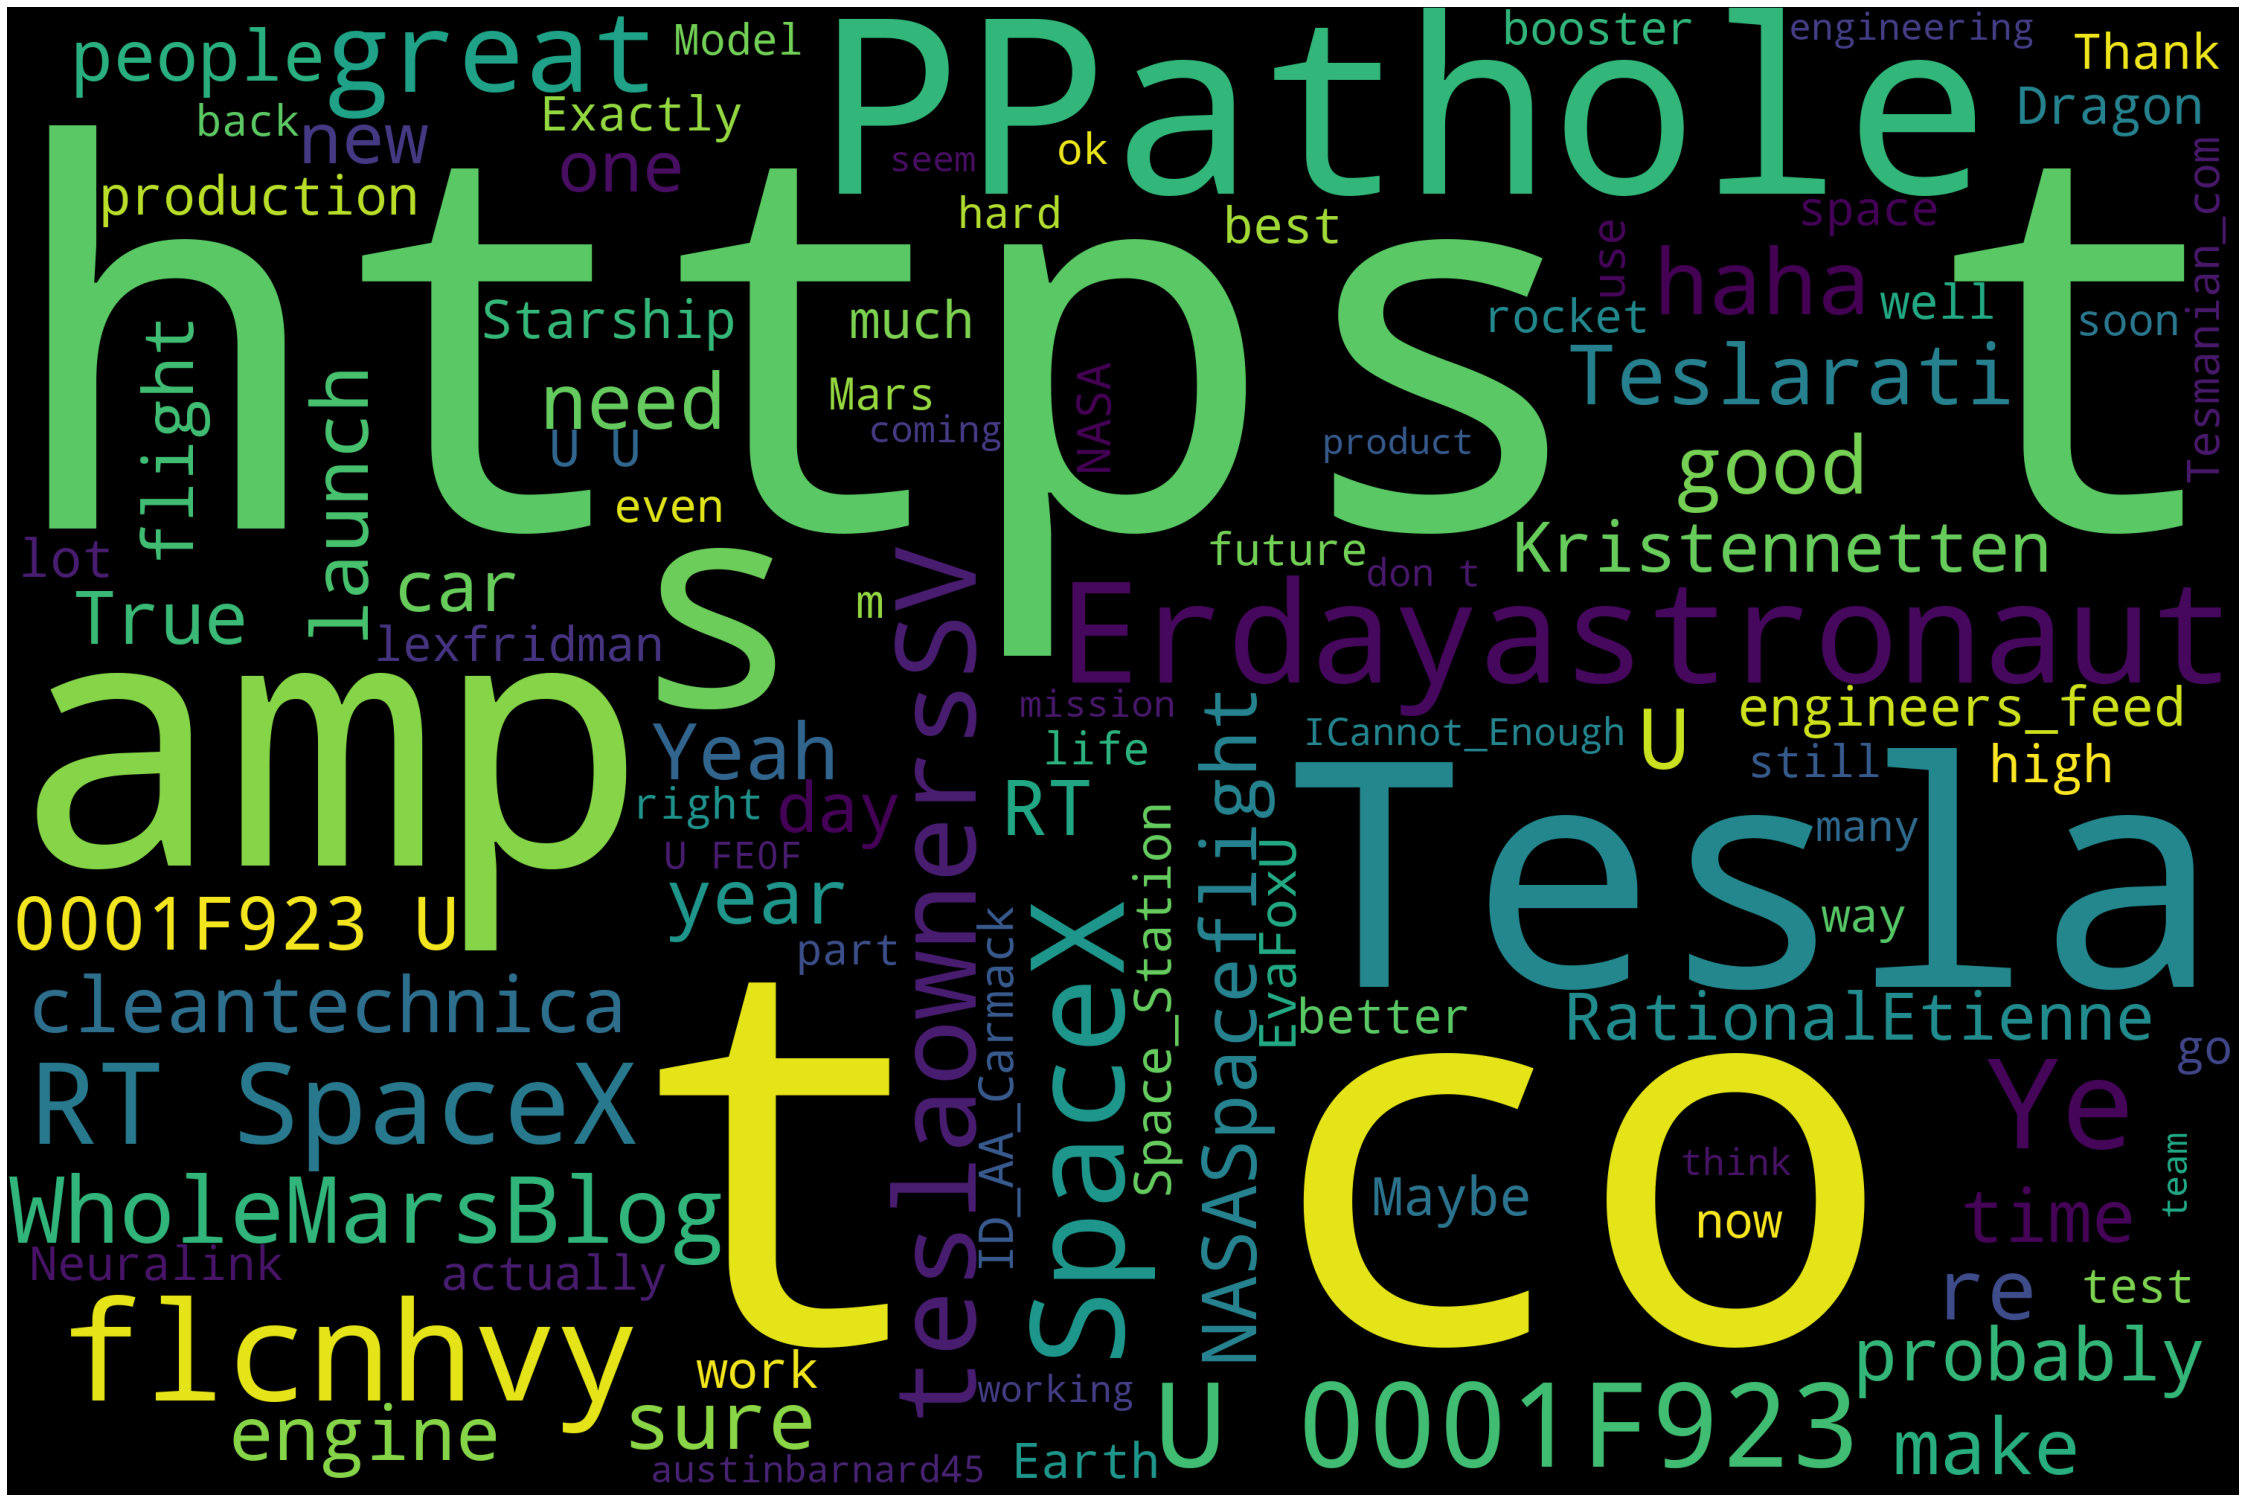

In [63]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width=3000, height=2000, background_color = 'black', max_words = 100, stopwords = stopwords).generate(text)
word_cloud(wordcloud)